In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

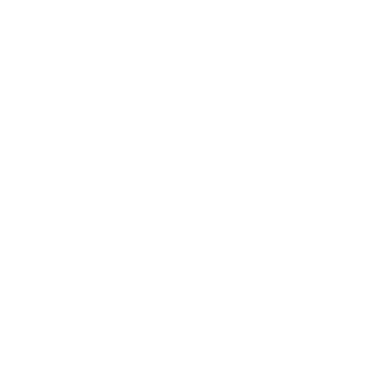

In [2]:
white_image = np.ones((500, 500, 3), dtype=np.uint8) * 255

plt.imshow(white_image)
plt.axis('off') 
plt.show()

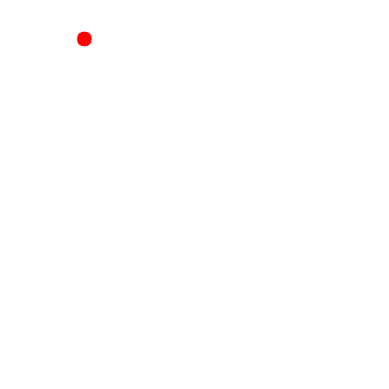

In [3]:
cv2.circle(white_image, (100, 40), 10, (255, 0, 0), -1)

plt.imshow(white_image)
plt.axis('off') 
plt.show()

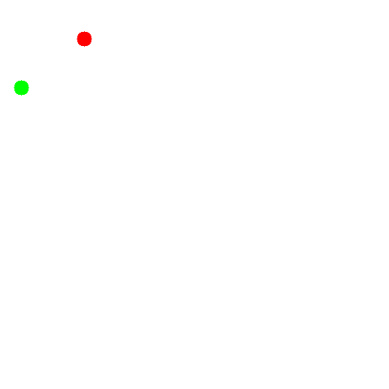

In [4]:
a = np.array([100, 40])

angle = 60 * np.pi / 180 

rotation_matrix = np.array([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle), np.cos(angle)]
])

b = rotation_matrix @ a 
b = b.astype(int)

cv2.circle(white_image, (b[0], b[1]), 10, (0, 255, 0), -1)

plt.imshow(white_image)
plt.axis('off') 
plt.show()

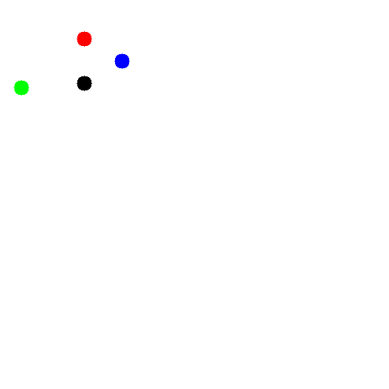

In [ ]:
c = np.array([100, 100])
cv2.circle(white_image, (c[0], c[1]), 10, (0, 0, 0), -1)

a_translated = a - c

d_translated = rotation_matrix @ a_translated 

d = d_translated + c
d = d.astype(int) 

cv2.circle(white_image, (d[0], d[1]), 10, (0, 0, 255), -1)

plt.imshow(white_image)
plt.axis('off')
plt.show()

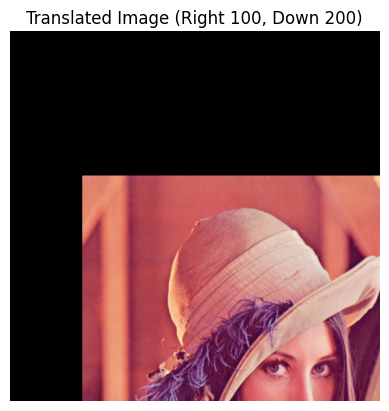

In [6]:
image = cv2.imread('lena.png')

M = np.array([[1, 0, 100], [0, 1, 200]], dtype=np.float32)

translated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)

plt.imshow(translated_image_rgb)
plt.axis('off')  
plt.title("Translated Image (Right 100, Down 200)")
plt.show()

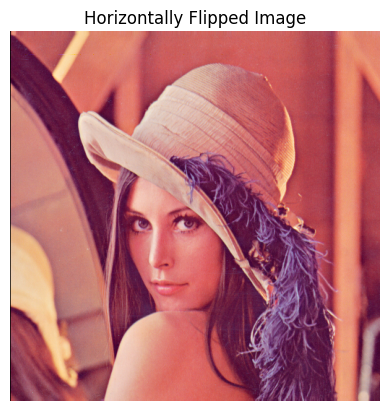

In [7]:
image = cv2.imread('lena.png')
image_height, image_width = image.shape[:2]

M = np.array([[-1, 0, image_width], [0, 1, 0]], dtype=np.float32)

flipped_image = cv2.warpAffine(image, M, (image_width, image_height))

flipped_image_rgb = cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB)

plt.imshow(flipped_image_rgb)
plt.axis('off') 
plt.title("Horizontally Flipped Image")
plt.show()

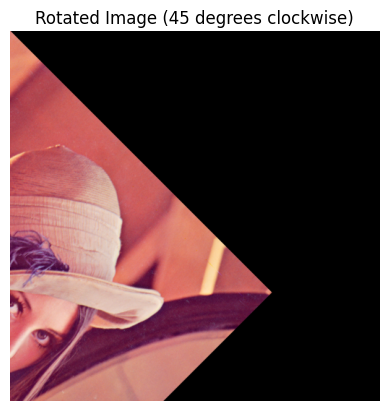

In [8]:
image = cv2.imread('lena.png')
image_height, image_width = image.shape[:2]

theta = 45 * np.pi / 180

M = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0]
], dtype=np.float32)

rotated_image = cv2.warpAffine(image, M, (image_width, image_height))

rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

plt.imshow(rotated_image_rgb)
plt.axis('off') 
plt.title("Rotated Image (45 degrees clockwise)")
plt.show()

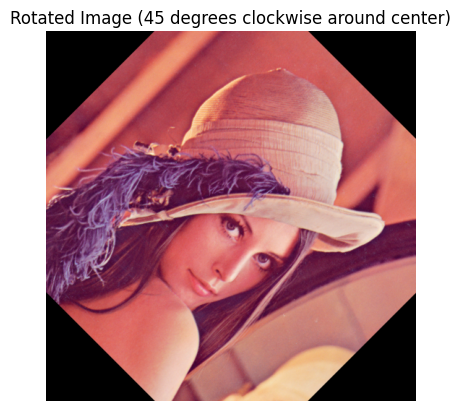

In [9]:
image = cv2.imread('lena.png')
image_height, image_width = image.shape[:2]

center_x = image_width / 2
center_y = image_height / 2

T1 = np.array([[1, 0, -center_x],
               [0, 1, -center_y],
               [0, 0, 1]], dtype=np.float32)

theta = 45 * np.pi / 180  
R = np.array([[np.cos(theta), -np.sin(theta), 0],
              [np.sin(theta), np.cos(theta), 0],
              [0, 0, 1]], dtype=np.float32)

T2 = np.array([[1, 0, center_x],
               [0, 1, center_y],
               [0, 0, 1]], dtype=np.float32)

M = T2 @ R @ T1 

rotated_image = cv2.warpAffine(image, M[:-1], (image_width, image_height))

rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

plt.imshow(rotated_image_rgb)
plt.axis('off')  
plt.title("Rotated Image (45 degrees clockwise around center)")
plt.show()

In [22]:
A = np.array([
    [1, 0, 20],
    [0, 1, 20],
    [0, 0, 1]
])

B = np.array([
    [0, 1, 0],
    [-1, 0, 0],
    [0, 0, 1]
])

C = np.array([
    [1, 0, -20],
    [0, 1, -20],
    [0, 0, 1]
])

M = (A @ B) @ C
M

array([[ 0,  1,  0],
       [-1,  0, 40],
       [ 0,  0,  1]])